## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
df = pd.read_csv("sample_data/champignons (1).csv")
print(df.head())

     toxicite surface-chapeau ecchymoses attache-lamelles taille-lamelles  \
0     toxique           lisse        oui            libre          étroit   
1  comestible           lisse        oui            libre           large   
2  comestible           lisse        oui            libre           large   
3     toxique        écaillée        oui            libre          étroit   
4  comestible           lisse        non            libre           large   

    forme-pied surface-pied-sur-anneau couleur-pied-sur-anneau couleur-voile  \
0  élargissant                   lisse                   blanc         blanc   
1  élargissant                   lisse                   blanc         blanc   
2  élargissant                   lisse                   blanc         blanc   
3  élargissant                   lisse                   blanc         blanc   
4       effilé                   lisse                   blanc         blanc   

  type-anneau population  
0     pendant  dispersée  
1 

1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [13]:
le = preprocessing.LabelEncoder()
df_encoded = df.apply(le.fit_transform)
y = df_encoded['toxicite']
X = df_encoded.drop('toxicite', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_train.columns)

(6499, 10)
Index(['surface-chapeau', 'ecchymoses', 'attache-lamelles', 'taille-lamelles',
       'forme-pied', 'surface-pied-sur-anneau', 'couleur-pied-sur-anneau',
       'couleur-voile', 'type-anneau', 'population'],
      dtype='object')


1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [21]:
categorical_features = df.drop('toxicite', axis=1).columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = ohe.fit_transform(df[categorical_features])
feature_names = ohe.get_feature_names_out(categorical_features)
df_onehot = pd.DataFrame(encoded_features, columns=feature_names)
df_onehot['toxicite'] = df_encoded['toxicite']
df_onehot_shuffled = df_onehot.sample(frac=1, random_state=42).reset_index(drop=True)
print(f"Shape of the new DataFrame: {df_onehot_shuffled.shape}")
print("New column names:")
print(df_onehot_shuffled.columns.tolist())
print("\nFirst 5 rows of the shuffled DataFrame:")
print(df_onehot_shuffled.head())

Shape of the new DataFrame: (8124, 41)
New column names:
['surface-chapeau_fibreuse', 'surface-chapeau_lisse', 'surface-chapeau_rainurée', 'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent', 'attache-lamelles_libre', 'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé', 'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse', 'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse', 'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc', 'couleur-voile_brun', 'couleur-voile_jaune', 'couleur-voile_orange', 'type-anneau_aucun', 'type-anneau_fibreux', 'type-anneau_large', 'type-anneau_pendant', 'type-anneau_évasé', 'popu

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [17]:
y = df_onehot_shuffled['toxicite']
X = df_onehot_shuffled.drop('toxicite', axis=1)
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_dev: {X_dev.shape}")
print(f"Shape of y_dev: {y_dev.shape}")
print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 rows of y_train:")
print(y_train.head())

Shape of X_train: (5686, 40)
Shape of y_train: (5686,)
Shape of X_dev: (2438, 40)
Shape of y_dev: (2438,)

First 5 rows of X_train:
      surface-chapeau_fibreuse  surface-chapeau_lisse  \
5921                       1.0                    0.0   
1073                       1.0                    0.0   
3710                       1.0                    0.0   
144                        1.0                    0.0   
5469                       0.0                    1.0   

      surface-chapeau_rainurée  surface-chapeau_écaillée  ecchymoses_non  \
5921                       0.0                       0.0             1.0   
1073                       0.0                       0.0             1.0   
3710                       0.0                       0.0             1.0   
144                        0.0                       0.0             1.0   
5469                       0.0                       0.0             1.0   

      ecchymoses_oui  attache-lamelles_adhérent  attache-lamelles_li

## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

In [18]:
import matplotlib.pyplot as plt

2.2 Afficher l'arbre obtenu en utilisant graphwiz

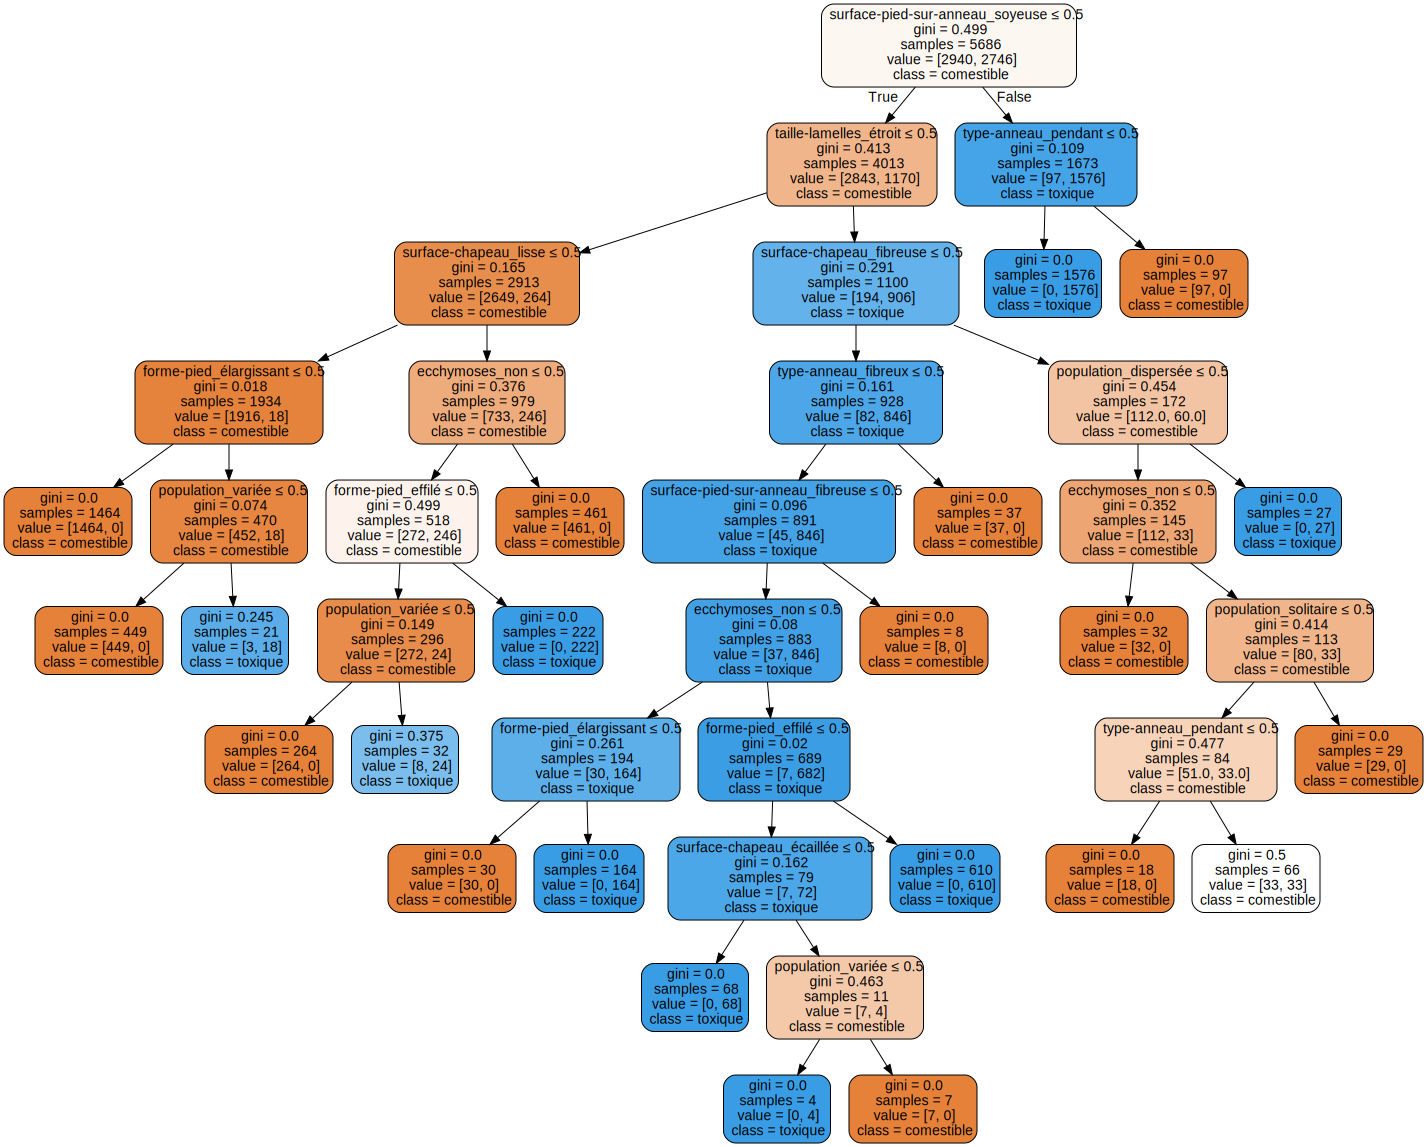

In [20]:
import graphviz
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dot_data = export_graphviz(
    dtc,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['comestible', 'toxique'],
    filled=True,
    rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

2.3 Mesurer la précision du modèle sur les données de dev

In [22]:
y_pred_dtc = dtc.predict(X_dev)
accuracy_dtc = accuracy_score(y_dev, y_pred_dtc)
print(f"Accuracy of the Decision Tree Classifier on the development set: {accuracy_dtc:.4f}")

Accuracy of the Decision Tree Classifier on the development set: 0.9918


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)
print("Random Forest Classifier trained successfully!")

Random Forest Classifier trained successfully!


3.2 Afficher trois arbres au hasard.

Displaying 3 random trees from the Random Forest:

Tree 1 (index 93):


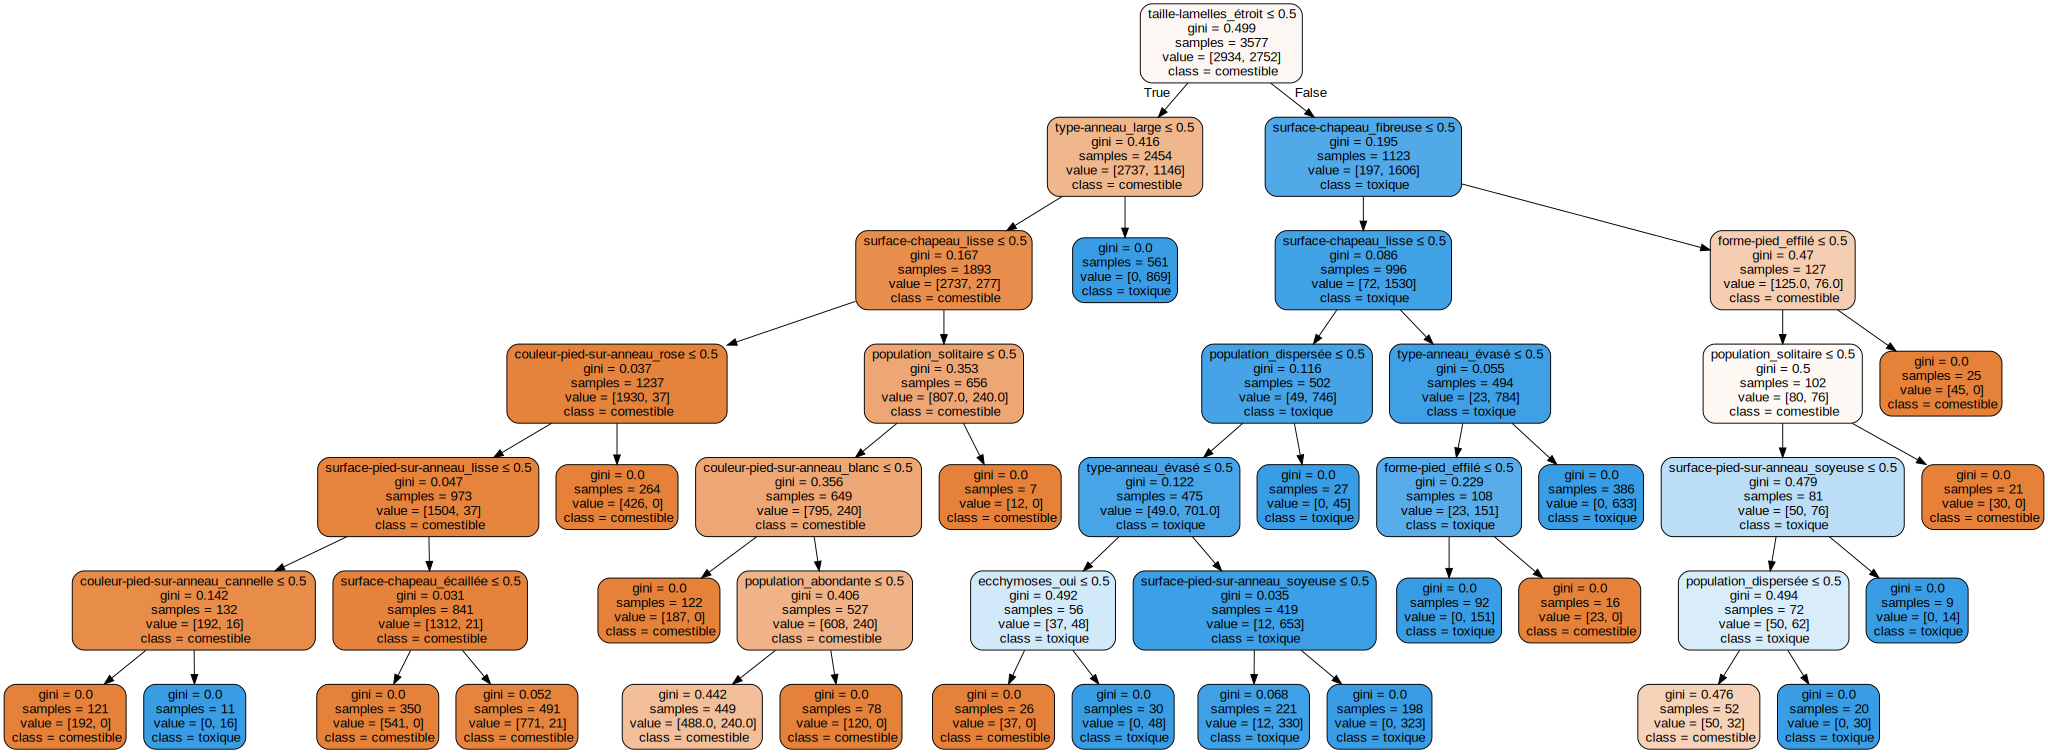



Tree 2 (index 340):


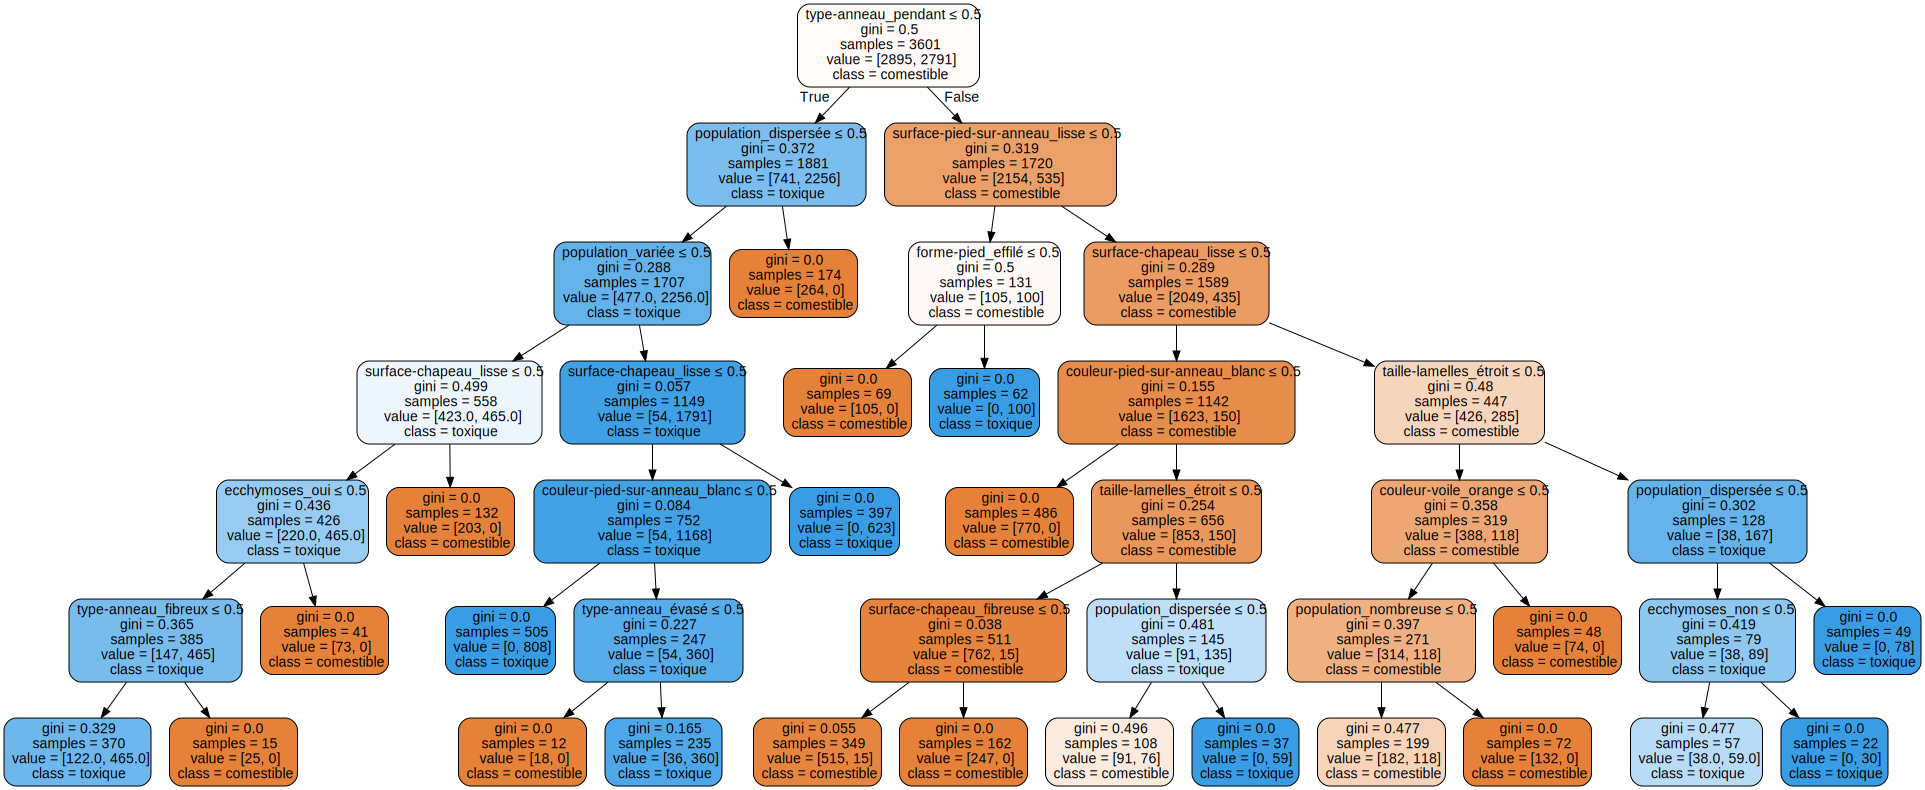



Tree 3 (index 14):


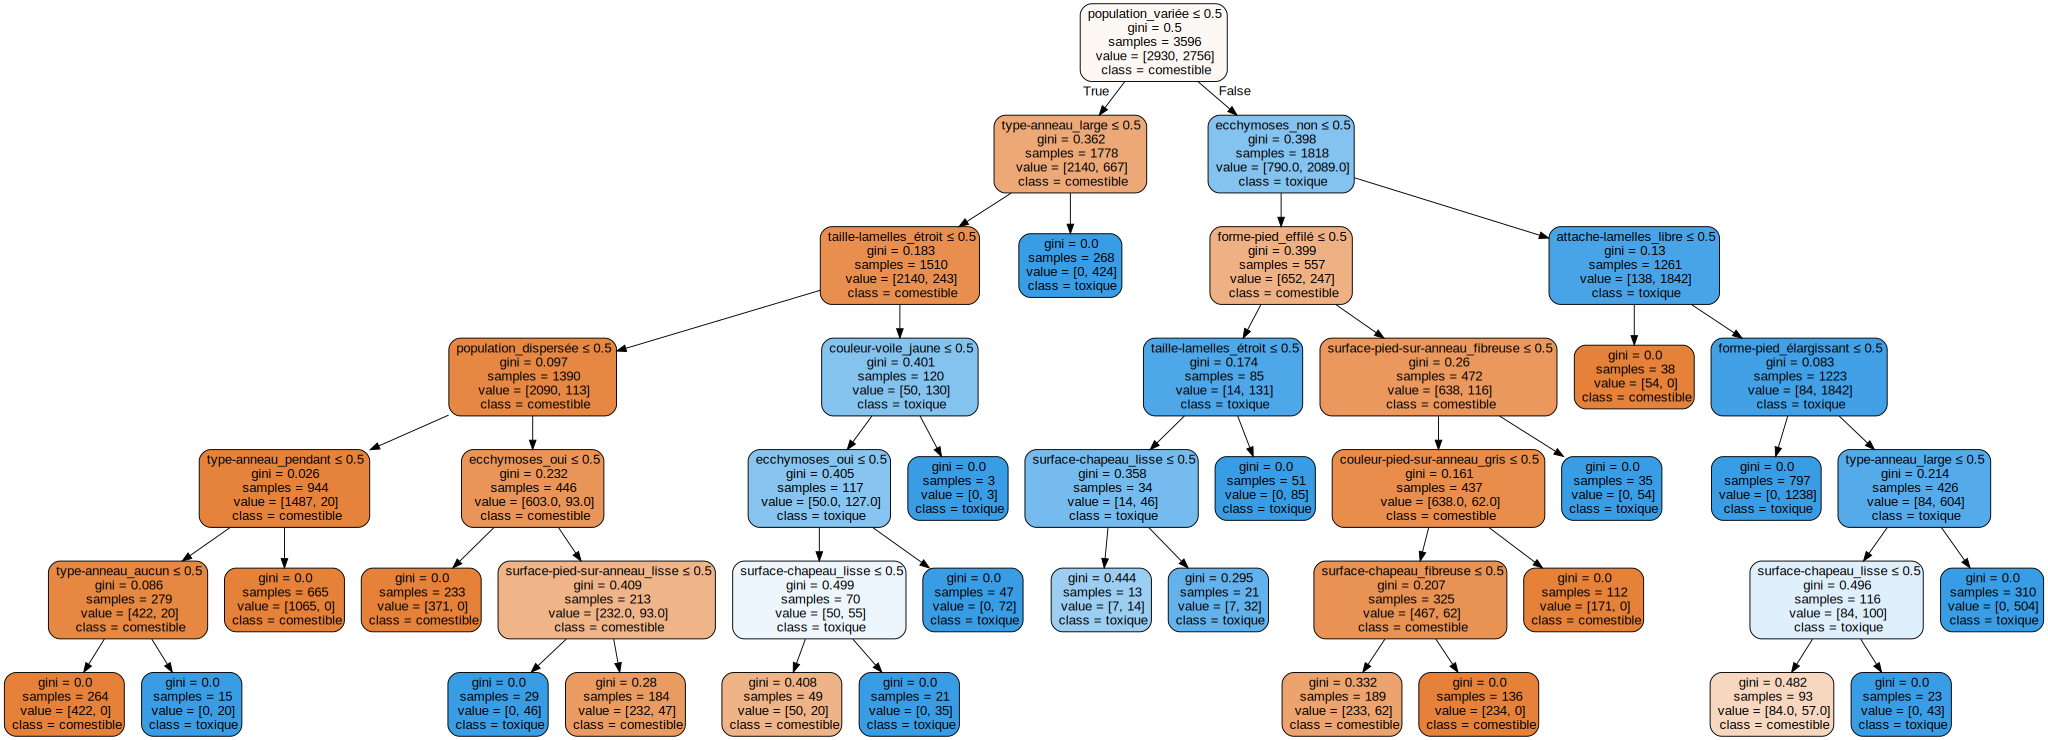

In [28]:
from random import randint
from sklearn.tree import export_graphviz
import graphviz
num_trees = len(rf_classifier.estimators_)
random_indices = [randint(0, num_trees - 1) for _ in range(3)]
print("Displaying 3 random trees from the Random Forest:\n")
for i, tree_idx in enumerate(random_indices):
    print(f"Tree {i+1} (index {tree_idx}):")
    tree_model = rf_classifier.estimators_[tree_idx]
    dot_data = export_graphviz(
        tree_model,
        out_file=None,
        feature_names=X_train.columns,
        class_names=['comestible', 'toxique'],
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    display(graph)
    print("\n")

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [29]:
y_pred_rf = rf_classifier.predict(X_dev)
accuracy_rf = accuracy_score(y_dev, y_pred_rf)
print(f"Accuracy of the Random Forest Classifier on the development set: {accuracy_rf:.4f}")

Accuracy of the Random Forest Classifier on the development set: 0.9742


## 4. optimisation des paramètres (optionnel)

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison de  max_depth et n_estimator.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [4, 6, 8, 10]       # Maximum depth of the tree
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("GridSearchCV completed. Optimal parameters and scores will be displayed in the next cell.")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV completed. Optimal parameters and scores will be displayed in the next cell.


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [33]:
from sklearn.metrics import accuracy_score
print("Optimal parameters found by GridSearchCV:")
print(grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_dev)
accuracy_best_rf = accuracy_score(y_dev, y_pred_best_rf)
print(f"\nPrecision on the development set with optimal parameters: {accuracy_best_rf:.4f}")

Optimal parameters found by GridSearchCV:
{'max_depth': 10, 'n_estimators': 100}

Precision on the development set with optimal parameters: 0.9918


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [40]:
feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
important_features = features_df[features_df['Importance'] > 0.01]
print("Features with importance greater than 1%:")
print(important_features.to_string(index=False))

Features with importance greater than 1%:
                         Feature  Importance
          taille-lamelles_étroit    0.104402
           taille-lamelles_large    0.092028
 surface-pied-sur-anneau_soyeuse    0.091778
             type-anneau_pendant    0.078515
               population_variée    0.070998
                  ecchymoses_non    0.063324
   surface-pied-sur-anneau_lisse    0.054886
               type-anneau_large    0.049016
                  ecchymoses_oui    0.046451
               forme-pied_effilé    0.043496
           surface-chapeau_lisse    0.037784
          forme-pied_élargissant    0.036663
   couleur-pied-sur-anneau_blanc    0.035560
            population_dispersée    0.031010
surface-pied-sur-anneau_fibreuse    0.025306
               type-anneau_évasé    0.022177
            population_solitaire    0.018542
        surface-chapeau_fibreuse    0.017512
        surface-chapeau_écaillée    0.016362
            population_abondante    0.013557


## 5. Stacking

Essayer différents modèles d'estimateur final

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting (Optionnel avec fin cours 2 à réaliser en FOAD)

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?